1D data at station: IUANTO at stating time: 2022-09-06T12:14:14.600000Z
3D data at station: IUANTO at stating time: 2022-09-06T12:14:13.387750Z


Text(0.5, 0.98, 'Synthetics before processing')

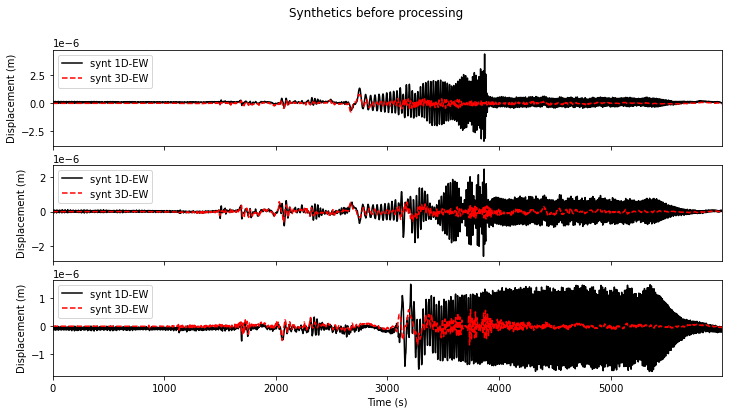

In [14]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Tue Sep  6 14:07:56 2022

@author: andreacamilarianoescandon
"""

# Code to preprocess data
# Comparing synthetics following steps from ShakeMovie : https://global.shakemovie.princeton.edu/science.jsp
# Synthetic data downloaded from shakemovie

from obspy import signal
from obspy import read
import numpy as np
import matplotlib.pyplot as plt

Data1_x = read('C202209061214A.1D.sac/IU.ANTO.LXE.modes.sac', debug_headers=True)
Data1_y = read('C202209061214A.1D.sac/IU.ANTO.LXN.modes.sac', debug_headers=True)
Data1_z = read('C202209061214A.1D.sac/IU.ANTO.LXZ.modes.sac', debug_headers=True)

Data2_x = read('C202209061214A.3D.sac/IU.ANTO.MXE.sem.sac', debug_headers=True)
Data2_y = read('C202209061214A.3D.sac/IU.ANTO.MXN.sem.sac', debug_headers=True)
Data2_z = read('C202209061214A.3D.sac/IU.ANTO.MXZ.sem.sac', debug_headers=True)

# Merge in one stream to get data 
Data1Merged = Data1_x + Data1_y + Data1_z
Data2Merged = Data2_x + Data2_y + Data2_z

#----------------------------------------------------------------------------------
# Station name and starting time 
#----------------------------------------------------------------------------------
Data1_Network=Data1_x[0].stats.network
Data1_Station=Data1_x[0].stats.station
Data1_ST=Data1_x[0].stats.starttime
Data1_ET=Data1_x[0].stats.endtime

Data2_Network=Data2_x[0].stats.network
Data2_Station=Data2_x[0].stats.station
Data2_ST=Data2_x[0].stats.starttime
Data2_ET=Data2_x[0].stats.endtime

print('1D data at station:', Data1_Network+Data1_Station,'at stating time:',Data1_ST)
print('3D data at station:', Data2_Network+Data2_Station,'at stating time:',Data2_ST)

#----------------------------------------------------------------------------------
# Time step for each case
#----------------------------------------------------------------------------------
Data1_dt=Data1_x[0].stats.delta
Data2_dt=Data2_x[0].stats.delta

#----------------------------------------------------------------------------------
# Number of points for each case
#----------------------------------------------------------------------------------
Data1_npts=Data1_x[0].stats.npts
Data2_npts=Data2_x[0].stats.npts

#----------------------------------------------------------------------------------
# Plots before filtering 
#----------------------------------------------------------------------------------
Data1Merged.plot(outfile='A_1D_beforeProcessing.png',) 
Data2Merged.plot(outfile='A_3D_beforeProcessing.png',)

# Figures
fig, axes = plt.subplots(nrows=3, sharex=True, figsize=(12, 6))
axes[0].plot(Data1Merged[0].times(), Data1Merged[0].data, "k", label="synt 1D-EW" )
axes[0].plot(Data2Merged[0].times(), Data2Merged[0].data, "--r", label="synt 3D-EW")
axes[0].set_ylabel("Displacement (m)")

axes[1].plot(Data1Merged[1].times(), Data1Merged[1].data, "k", label="synt 1D-EW" )
axes[1].plot(Data2Merged[1].times(), Data2Merged[1].data, "--r", label="synt 3D-EW")
axes[1].set_ylabel("Displacement (m)")

axes[2].plot(Data1Merged[2].times(), Data1Merged[2].data, "k", label="synt 1D-EW" )
axes[2].plot(Data2Merged[2].times(), Data2Merged[2].data, "--r", label="synt 3D-EW")
axes[2].set_ylabel("Displacement (m)")
axes[2].set_xlabel("Time (s)")
axes[2].set_xlim(0, np.max([(np.max(Data1Merged[0].times()),np.max(Data2Merged[0].data))]))

axes[0].legend(loc=2)
axes[1].legend(loc=2)
axes[2].legend(loc=2)
fig.suptitle('Synthetics before processing',fontsize=12)

In [18]:
#----------------------------------------------------------------------------------
# Resample and cutting signal to a common window (Resample at 1Hz)
#----------------------------------------------------------------------------------
print('Stream data before resampling-----------------------------------------------------------------------')
print(Data1Merged)
print(Data2Merged)

# Cut signal to common starting time and end time
Common_startime=np.max([Data1_ST,Data2_ST])
Common_endtime=np.min([Data1_ET,Data1_ET])
Data1Merged.trim(Common_startime,Common_endtime)
Data2Merged.trim(Common_startime,Common_endtime)

# Resample
fstep=1
Data1Merged.resample(fstep)  
Data2Merged.resample(fstep)  

print('Stream data after resampling-----------------------------------------------------------------------')
print(Data1Merged)
print(Data2Merged)

Stream data before resampling-----------------------------------------------------------------------
3 Trace(s) in Stream:
IU.ANTO.S1.LXE | 2022-09-06T12:14:14.600000Z - 2022-09-06T13:54:13.600000Z | 1.0 Hz, 6000 samples
IU.ANTO.S1.LXN | 2022-09-06T12:14:14.600000Z - 2022-09-06T13:54:13.600000Z | 1.0 Hz, 6000 samples
IU.ANTO.S1.LXZ | 2022-09-06T12:14:14.600000Z - 2022-09-06T13:54:13.600000Z | 1.0 Hz, 6000 samples
3 Trace(s) in Stream:
IU.ANTO.S3.MXE | 2022-09-06T12:14:14.679750Z - 2022-09-06T13:54:11.679750Z | 1.0 Hz, 5998 samples
IU.ANTO.S3.MXN | 2022-09-06T12:14:14.679750Z - 2022-09-06T13:54:11.679750Z | 1.0 Hz, 5998 samples
IU.ANTO.S3.MXZ | 2022-09-06T12:14:14.679750Z - 2022-09-06T13:54:11.679750Z | 1.0 Hz, 5998 samples
Stream data after resampling-----------------------------------------------------------------------
3 Trace(s) in Stream:
IU.ANTO.S1.LXE | 2022-09-06T12:14:14.600000Z - 2022-09-06T13:54:12.600000Z | 1.0 Hz, 5999 samples
IU.ANTO.S1.LXN | 2022-09-06T12:14:14.600000Z - 

Text(0.5, 0.98, 'Resampled and cutted signals, trend and mean removed, tapered 5% - unfiltered')

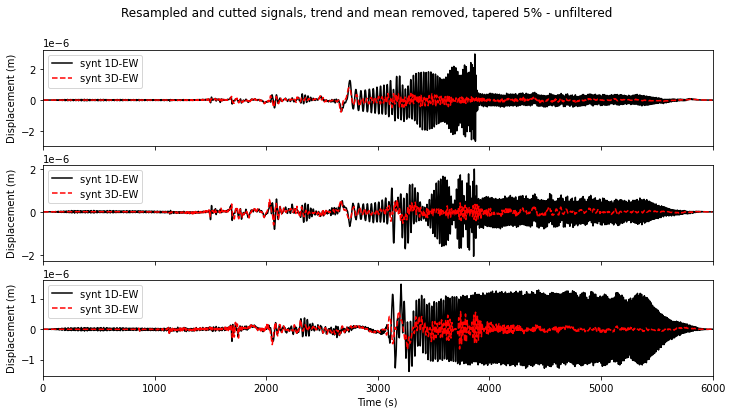

In [16]:
#----------------------------------------------------------------------------------
# Remove the trend and mean from the the observed and synthetic records and taper them.
#----------------------------------------------------------------------------------
Data1Merged.detrend("demean")
Data1Merged.detrend("linear")
Data1Merged.taper(0.05)

Data2Merged.detrend("demean")
Data2Merged.detrend("linear")
Data2Merged.taper(0.05)

# Figures
fig, axes = plt.subplots(nrows=3, sharex=True, figsize=(12, 6))
axes[0].plot(Data1Merged[0].times(), Data1Merged[0].data, "k", label="synt 1D-EW" )
axes[0].plot(Data2Merged[0].times(), Data2Merged[0].data, "--r", label="synt 3D-EW")
axes[0].set_ylabel("Displacement (m)")

axes[1].plot(Data1Merged[1].times(), Data1Merged[1].data, "k", label="synt 1D-EW" )
axes[1].plot(Data2Merged[1].times(), Data2Merged[1].data, "--r", label="synt 3D-EW")
axes[1].set_ylabel("Displacement (m)")

axes[2].plot(Data1Merged[2].times(), Data1Merged[2].data, "k", label="synt 1D-EW" )
axes[2].plot(Data2Merged[2].times(), Data2Merged[2].data, "--r", label="synt 3D-EW")
axes[2].set_ylabel("Displacement (m)")
axes[2].set_xlabel("Time (s)")
axes[2].set_xlim(0, np.max([len(Data1Merged[2].times()),len(Data2Merged[2].data)]))

axes[0].legend(loc=2)
axes[1].legend(loc=2)
axes[2].legend(loc=2)
fig.suptitle('Resampled and cutted signals, trend and mean removed, tapered 5% - unfiltered',fontsize=12)

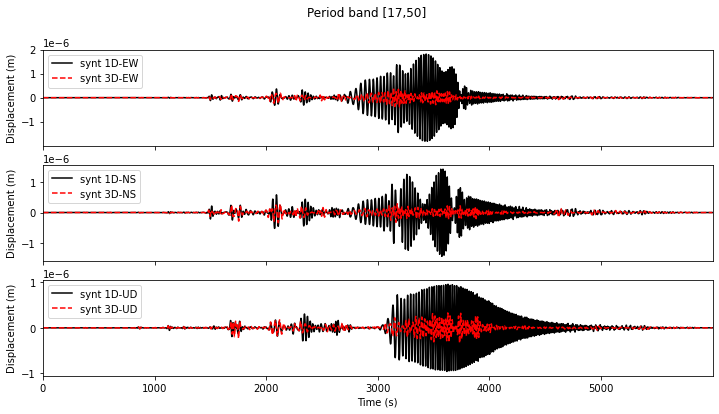

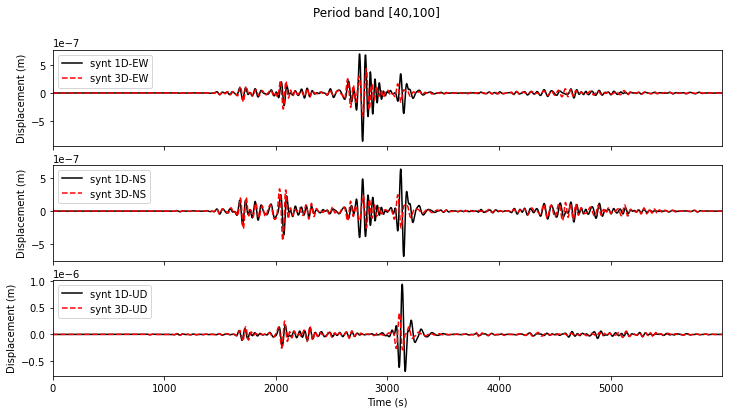

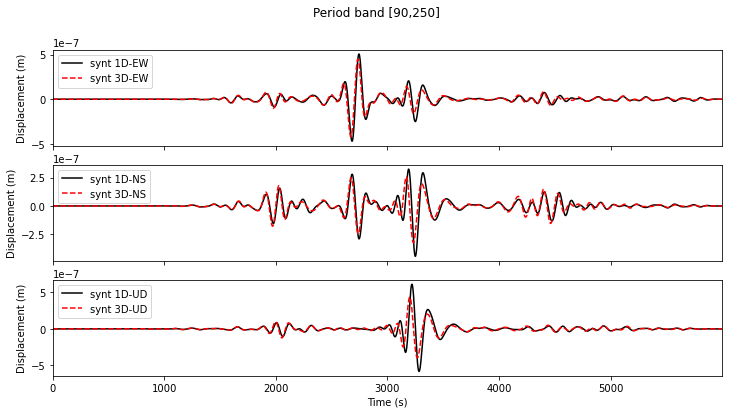

In [19]:
#----------------------------------------------------------------------------------
# Remove the instrument response from the observed seismograms (recommended) or convolve the synthetic seismograms with the instrument response.
#----------------------------------------------------------------------------------
# In this case I have not observed data, so this step is skipped 

#----------------------------------------------------------------------------------
# Filtering signals 
#----------------------------------------------------------------------------------
# Make sure that you apply the exact same filtering operations to both observed 
# and synthetic seismograms. Preferably, avoid filtering your records more than once, 
# and if you do filter more than once, make sure you filter both the data and the 
# synthetics with the same filter, such that data and synthetics are always subjected 
# to the same filtering operations.

Tmin1,Tmax1 = 17, 50
Tmin2,Tmax2 = 40, 100
Tmin3,Tmax3 = 90, 250


for i in [1,2,3]:
    if i == 1 :  
        tmin=Tmin1
        tmax=Tmax1
        Data1_windowed=Data1Merged.copy()
        Data2_windowed=Data2Merged.copy()
    elif i == 2 : 
        tmin=Tmin2
        tmax=Tmax2
        Data1_windowed=Data1Merged.copy()
        Data2_windowed=Data2Merged.copy()
    elif i == 3 : 
        tmin=Tmin3
        tmax=Tmax3
        Data1_windowed=Data1Merged.copy()
        Data2_windowed=Data2Merged.copy()
    
    freqmin=1/tmax
    freqmax=1/tmin

    Data1_windowed.filter("bandpass", freqmin=freqmin, freqmax=freqmax,corners=4, zerophase=True)
    Data2_windowed.filter("bandpass", freqmin=freqmin, freqmax=freqmax,corners=4, zerophase=True)

    fig, axes = plt.subplots(nrows=3, sharex=True, figsize=(12, 6))
    axes[0].plot(Data1_windowed[0].times(), Data1_windowed[0].data, "k", label='synt 1D-EW')
    axes[0].plot(Data2_windowed[0].times(), Data2_windowed[0].data, "--r", label='synt 3D-EW')
    axes[0].set_ylabel("Displacement (m)")

    axes[1].plot(Data1_windowed[1].times(), Data1_windowed[1].data, "k", label='synt 1D-NS')
    axes[1].plot(Data2_windowed[1].times(), Data2_windowed[1].data, "--r", label='synt 3D-NS')
    axes[1].set_ylabel("Displacement (m)")

    axes[2].plot(Data1_windowed[2].times(), Data1_windowed[2].data, "k", label='synt 1D-UD')
    axes[2].plot(Data2_windowed[2].times(), Data2_windowed[2].data, "--r", label='synt 3D-UD')
    axes[2].set_ylabel("Displacement (m)")
    axes[2].set_xlabel("Time (s)")
    axes[2].set_xlim(0, np.max([len(Data1Merged[i-1].times()),len(Data2Merged[i-1].data)]))
   
    axes[0].legend(loc=2)
    axes[1].legend(loc=2)
    axes[2].legend(loc=2)
    fig.suptitle('Period band ['+str(tmin)+','+str(tmax)+']',fontsize=12)
            
#----------------------------------------------------------------------------------
# END 
#----------------------------------------------------------------------------------